# Kaggle Project-2
# Blood Cell Images Classification
- 출처(source) : https://www.kaggle.com/datasets/paultimothymooney/blood-cells
- 목표 : ImageDataGenerator와 TL(transfer learning)을 이용해서 과대적합을 최소화하여 90%이상의 정확도 달성
- goal : Minimize overfitting and achieve 90% or more accuracy


- Background
<p>The diagnosis of blood-based diseases often involves identifying and characterizing patient blood samples.
Automated methods to detect and classify blood cell subtypes have important medical applications.</p>
<p>혈액 기반 질병의 진단은 종종 환자의 혈액 샘플을 식별하고 특성화하는 것을 포함합니다. 혈액 세포의 유형을 감지하고 분류하는 것은 혈액 기반 질병 진단 과정 중  
혈액 세포 하위 유형을 감지하고 분류하는 자동화된 방법은 중요한 의학적 응용 분야를 가지고 있습니다.<p>

## Datasets

In [ ]:
# 구글 마운트
# Google mount
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# 현재 디렉토리 /content로 이미지 데이터 복사 후 현재 디렉토리 ROOT_DIR로 명명
# Copy image data to /content and name /content as ROOT_DIR
import shutil
shutil.copy("/content/drive/MyDrive/Colab Notebooks/Blood Cell Images.zip", "/content")
ROOT_DIR = "/content"

In [ ]:
# blood_cell_images 디렉토리 생성과 동시에 압축해제 후 blood_cell_images 디렉토리 DATA_ROOT_DIR로 명명
# Decompress data in blood_cell_images zip and name blood_cell_images dir as DATA_ROOT_DIR
import zipfile
with zipfile.ZipFile("/content/Blood Cell Images.zip", "r") as target_file:
  target_file.extractall("/content/blood_cell_images")
  DATA_ROOT_DIR = "/content/blood_cell_images"

## Path Naming

In [ ]:
# blood_cell_images 디렉토리에 TEST, TRAIN 그리고 TEST_SIMPLE 디렉토리 확인 후
# 각각 TEST_DATA_ROOT_DIR, TRIAN_DATA_ROOT_DIR로 명명
# Name TEST dir, TRAIN dir and TEST_SIMPLE dir in blood_cell_images dir as TEST_DATA_ROOT_DIR, TRAIN_DATA_ROOT_DIR, VAL_DATA_DIR
TRAIN_DATA_ROOT_DIR = "/content/blood_cell_images/TRAIN"
TEST_DATA_ROOT_DIR = "/content/blood_cell_images/TEST"
VAL_DATA_ROOT_DIR = "/content/blood_cell_images/TEST_SIMPLE"

## Checking total number of data and labels

In [ ]:
# 훈련 데이터 개수 파악
# number of Training data
import os
train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(train_label_name_list)

for train_label_name in train_label_name_list:
  print(train_label_name, "=>", len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, train_label_name))))

['NEUTROPHIL', 'MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL']
NEUTROPHIL => 2499
MONOCYTE => 2478
LYMPHOCYTE => 2483
EOSINOPHIL => 2497


In [ ]:
# 테스트 데이터 개수 파악
# number of Testing data
print(train_label_name_list)

for test_label_name in train_label_name_list:
  print(test_label_name, "=>", len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, test_label_name))))

['NEUTROPHIL', 'MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL']
NEUTROPHIL => 624
MONOCYTE => 620
LYMPHOCYTE => 620
EOSINOPHIL => 623


In [ ]:
# 검증 데이터 개수 파악
# number of validation data

print(train_label_name_list)

for val_label_name in train_label_name_list:
  print(val_label_name, "=>", len(os.listdir(os.path.join(VAL_DATA_ROOT_DIR, val_label_name))))

['NEUTROPHIL', 'MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL']
NEUTROPHIL => 48
MONOCYTE => 4
LYMPHOCYTE => 6
EOSINOPHIL => 13


## Setting image shape

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

## Importing data using ImageDataGenerator

In [ ]:
# ImageDataGenerator에 정규화 기능 추가
# Add normalizing function in ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# 이미지 색상, 크기, 레이블 타입 인코딩 설정
# setting image size, color mode and integer type encoding
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR,
                                                    batch_size = 32,
                                                    color_mode="rgb",
                                                    class_mode="sparse",
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT))

test_generator = train_datagen.flow_from_directory(TEST_DATA_ROOT_DIR,
                                                   batch_size = 32,
                                                   color_mode="rgb",
                                                   class_mode="sparse",
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT))

val_generator = val_datagen.flow_from_directory(VAL_DATA_ROOT_DIR,
                                                   batch_size = 32,
                                                   color_mode="rgb",
                                                   class_mode="sparse",
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [ ]:
# 레이블과 레이블 개수 확인
# checking labels and the number of labels

print(train_generator.class_indices, train_generator.num_classes)
print(test_generator.class_indices, test_generator.num_classes)
print(val_generator.class_indices, val_generator.num_classes)

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3} 4
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3} 4
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3} 4


## 32장의 이미지 확인
- ImageDataGenerator로 전달 된 이미지 확인

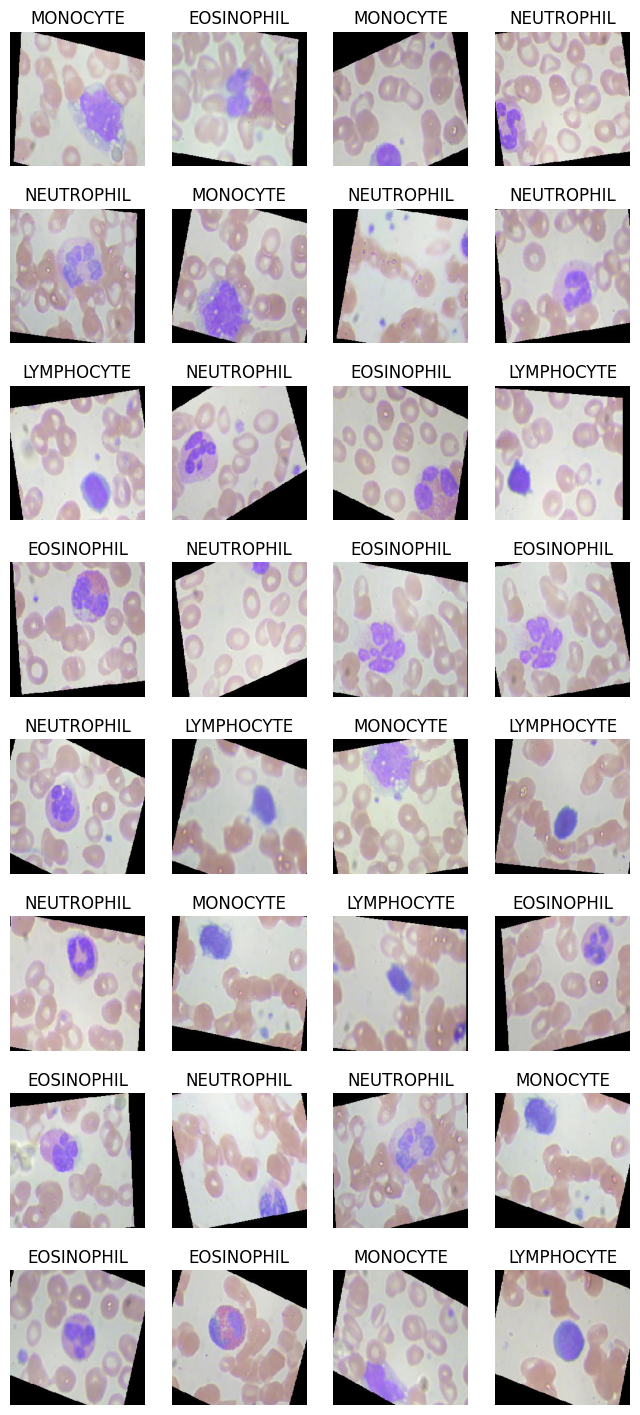

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 18))

images_32 = train_generator.next()
for i in range(len(images_32[1])):
  plt.subplot(8, 4, i+1)
  plt.imshow(images_32[0][i])
  plt.title(list(train_generator.class_indices.keys())[int(images_32[1][i])])
  plt.axis("off")

##Transfer Learning

In [ ]:
# fine tunning을 위한 학습된 모델 구축(MobileNet)
# Establishing pre-trained model(MobileNet) for fine tunning
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNet, Xception

pre_trained_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
pre_trained_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

## Fine Tunning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=["accuracy"])

In [ ]:
# 학습 시작
# Training

from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=30, validation_data=test_generator)

end_time = datetime.now()
print("ELapsed Time :", end_time - start_time)

Epoch 1/30
312/312 [==============================] - 78s 161ms/step - loss: 1.6053 - accuracy: 0.3087 - val_loss: 1.2867 - val_accuracy: 0.3848
Epoch 2/30
312/312 [==============================] - 45s 144ms/step - loss: 1.2485 - accuracy: 0.4483 - val_loss: 1.1038 - val_accuracy: 0.5380
Epoch 3/30
312/312 [==============================] - 49s 157ms/step - loss: 0.9828 - accuracy: 0.5877 - val_loss: 0.8950 - val_accuracy: 0.6466
Epoch 4/30
312/312 [==============================] - 45s 145ms/step - loss: 0.6999 - accuracy: 0.7248 - val_loss: 0.7010 - val_accuracy: 0.7435
Epoch 5/30
312/312 [==============================] - 51s 164ms/step - loss: 0.4840 - accuracy: 0.8161 - val_loss: 0.5894 - val_accuracy: 0.7917
Epoch 6/30
312/312 [==============================] - 45s 144ms/step - loss: 0.3473 - accuracy: 0.8734 - val_loss: 0.5519 - val_accuracy: 0.8243
Epoch 7/30
312/312 [==============================] - 45s 143ms/step - loss: 0.2467 - accuracy: 0.9112 - val_loss: 0.5097 - val_ac

## Visualization

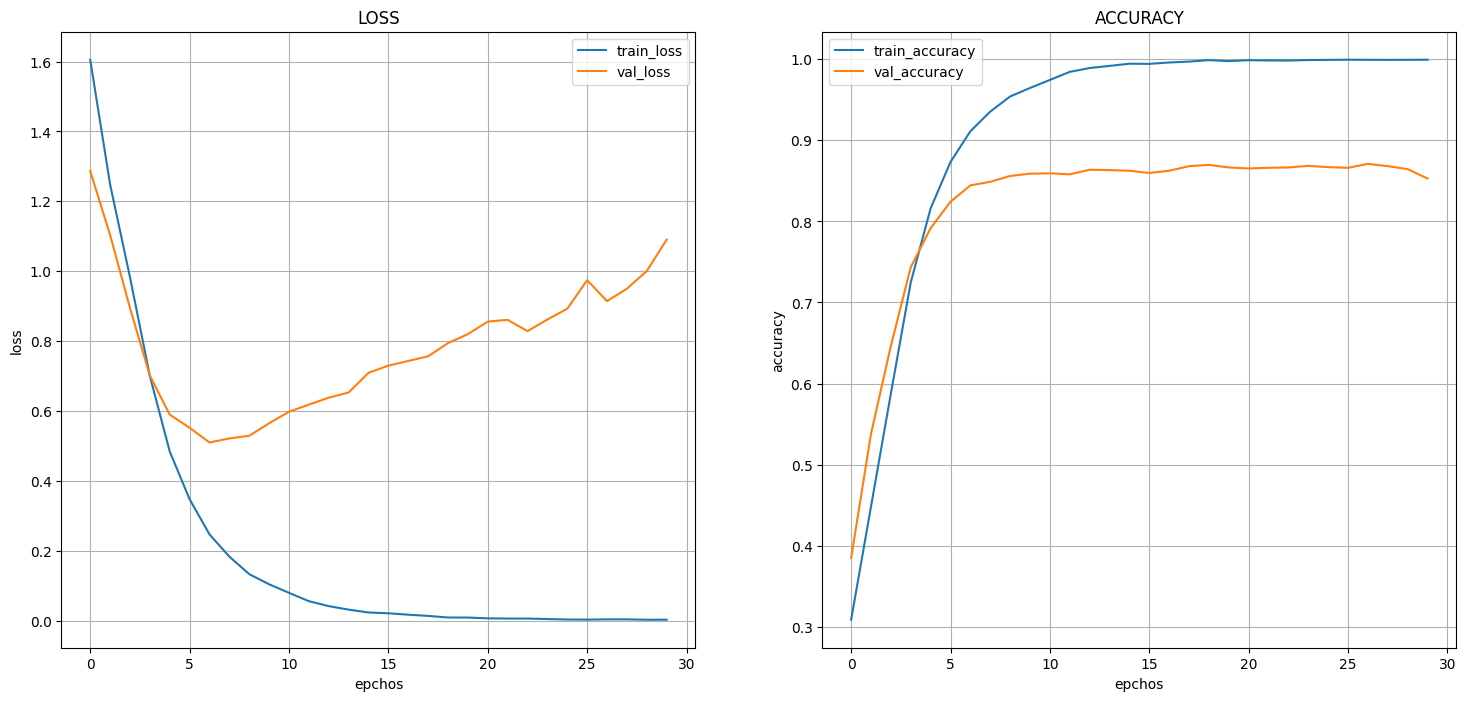

In [ ]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.title("LOSS")
plt.xlabel("epchos")
plt.ylabel("loss")
plt.grid()
plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="val_loss")
plt.legend(loc="best")

plt.subplot(1, 2, 2)
plt.title("ACCURACY")
plt.xlabel("epchos")
plt.ylabel("accuracy")
plt.grid()
plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="val_accuracy")
plt.legend(loc="best")

In [ ]:
model.evaluate(test_generator)

78/78 [==============================] - 6s 81ms/step - loss: 1.0904 - accuracy: 0.8528


[1.0903633832931519, 0.8528347611427307]

In [ ]:
model.evaluate(val_generator)

3/3 [==============================] - 1s 219ms/step - loss: 0.9847 - accuracy: 0.8873


[0.9846668243408203, 0.8873239159584045]